# Dipping Intrusion Model

In [1]:
"""
GravMag: Forward magnetic modeling using a stack of 3D polygonal model
"""
import json
import cPickle as pickle
import numpy as np
import os
from IPython.display import Image
from fatiando import mesher, gridder, utils
from fatiando.gravmag import prism
from fatiando.vis import mpl, myv

C:\Users\Michael\.conda\envs\py27\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")
C:\Users\Michael\.conda\envs\py27\lib\site-packages\fatiando\vis\myv.py:51: UserWarning: This module will be removed in v0.7.
  warnings.warn("This module will be removed in v0.7.")


In [2]:
# The position/size of anomaly
min_depth = 0
max_depth = 4000
delta_z = 500
length = 16000
min_y = 0 - length/2
min_x = -4000
max_x = 4000
# The regional field
inc = 30
dec = -15
# The bounds of the region
bounds = [-10000, 10000, -10000, 10000, 0, 5000]
area = bounds[:4]
# Determine number of depth slices
depths = np.linspace(min_depth,max_depth,100)
model = [];

In [3]:
# Create list of Prisms that descend in depth 
delta_y = length/len(depths)
for i in range(1, len(depths)):
    start_y = min_y + (i - 1)*delta_y
    stop_y  = start_y+delta_y
    model.append(
        mesher.Prism(min_x,max_x,start_y,stop_y, depths[i - 1], depths[i - 1]+delta_z,
                    {'magnetization': utils.ang2vec(10, inc, dec)}))

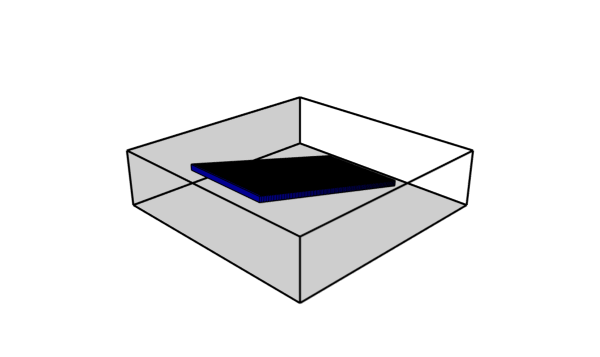

In [4]:
# Visualize the model
myv.figure(size=(600,400))
myv.prisms(model, prop='magnetization',edges=False)
myv.axes(myv.outline(bounds), ranges=[b*0.001 for b in bounds], nlabels=3, fmt='%.1f')
myv.wall_north(bounds)
myv.wall_bottom(bounds)
myv.savefig('./dippingmesh_model.png')
myv.show()
Image(filename='./dippingmesh_model.png')

In [5]:
# Create a regular grid at 100m height
shape = (200, 200)
xp, yp, zp = gridder.regular(area, shape, z=-500)

In [6]:
# Calculate the anomaly for a given regional field
tf = prism.tf(xp, yp, zp, model, inc, dec)

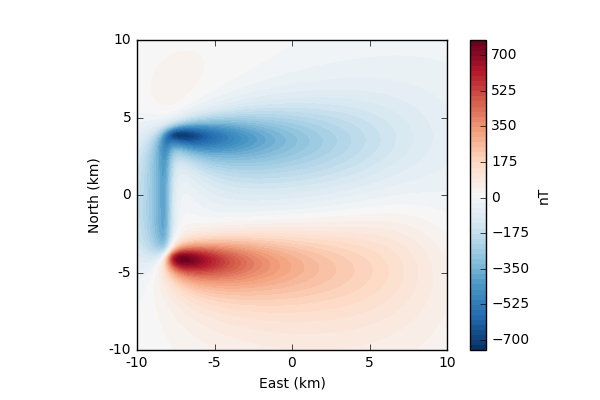

In [7]:
mpl.figure()
mpl.axis('scaled')
#for b in model:
#    mpl.polygon(b, xy2ne=True)
mpl.contourf(yp, xp, tf, shape, 60, cmap=mpl.cm.RdBu_r)
cb = mpl.colorbar().set_label('nT')
mpl.m2km()
mpl.xlabel('East (km)')
mpl.ylabel('North (km)')
mpl.savefig('./dippingmesh_synthetic_data.png')
Image(filename='./dippingmesh_synthetic_data.png')

## Output data

In [8]:
np.savetxt('./data/synthetic_data.txt', np.transpose([xp, yp, zp, tf]))

with open('./data/metadata.json', 'w') as f:
    json.dump(dict(area=area, bounds=bounds, inc=inc, dec=dec, shape=shape), f)
with open('./data/model.pickle', 'w') as f:
    pickle.dump(model, f)
#with open('./data/model.json', 'w') as f:
#    json.dump(model, f)